2688


<ipython-input-208-d6141c7e6c1b>:32: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  v[x, y] = estimate_optical_flow(image1_patch, image2_patch, size)


1344
1344
2688
1344
1344


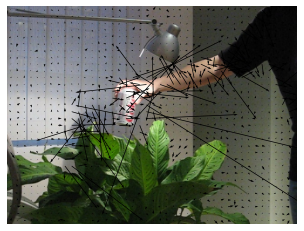

In [208]:
import numpy as np
import cv2
import scipy.signal
import matplotlib.pyplot as plt
  

def divide_input(image1, image2, size):
    h, w = image1.shape
    row = np.arange(0, h, size)
    column = np.arange(0, w, size)
    if row[-1] + size > h:
        row = row[0:-1]
    if column[-1] + size > w:
        column = column[0:-1]
    v = np.zeros((row.shape[0], column.shape[0], 2))
    print(v.size)
    image1_patch = np.zeros((size, size))
    image2_patch = np.zeros((size, size))
    
#     mesh = np.meshgrid(row, column)
#     center_points = list(zip(mesh[0].reshape(-1, ), mesh[1].reshape(-1, )))
#     print(len(center_points))
#     v = np.zeros((len(center_points), 2, 1))
#     print(v.shape)
    
    x = 0
    for i in row:
        y = 0
        for j in column:
            image1_patch= image1[i:i+size, j:j+size]
            image2_patch= image2[i:i+size, j:j+size]
            v[x, y] = estimate_optical_flow(image1_patch, image2_patch, size)
            y+=1
        x+=1        
    return v
            
def estimate_optical_flow(patch1, patch2, size):
    Gx = np.array([[-1, 0 ,1]])
    Gy = Gx.T
    A = np.zeros((patch1.size, 2))
    Ix = scipy.signal.convolve2d(patch1, Gx, boundary="symm", mode="same")
    Iy = scipy.signal.convolve2d(patch1, Gy, boundary="symm", mode="same")
    A[:,0] = np.array(Ix.reshape(-1))
    A[:,1] = np.array(Iy.reshape(-1))
    It = patch1 - patch2
    b = -1 * It.reshape(size * size, 1)
#     Gt = np.array([[-1, 1]])
#     b = -scipy.signal.convolve2d(np.vstack((np.ravel(patch1), np.ravel(patch2))).T, Gt, mode="valid")
     .
    
    return [vx, vy]
    
def display(image, v, size):
    fig = plt.figure()
    X, Y, _= np.meshgrid(np.arange(size // 2, image.shape[1] - size//2, size),
                      np.arange(size // 2, image.shape[0] - size//2, size),
                      np.arange(1))
    X = X[..., 0]
    Y = Y[..., 0]
    print(X.size)
    print(Y.size)
    print(v.size)
    vx = v[:, :, 0]
    vy = v[:, :, 1]
    print(vx.size)
    print(vy.size)
#     vx = np.ma.masked_equal(vx, 0)
#     vy = np.ma.masked_equal(vy, 0)
   
    plt.imshow(image, cmap="gray")
    plt.quiver(X, Y, vx, vy, angles='xy')
    plt.axis('off')
    plt.xticks([], [])
    plt.yticks([], [])
#     plt.savefig('coke_lk', bbox_inches='tight', pad_inches=0)
    plt.show()
    
if __name__ == "__main__":
    size = 15
    
    image1 = cv2.imread('/home/zhanghh/桌面/lab3-assignment/images/Coke1.jpg')
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    img1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
    img1 = img1.astype(np.float32)
    
    img2 = cv2.imread('/home/zhanghh/桌面/lab3-assignment/images/Coke2.jpg')
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
    img2 = img2.astype(np.float32)
    
    v = divide_input(img1, img2, size)
    
    display(image1, v, size)
    
    

(9, 5, 7, 4)


0.0


[[ 0.33333333 -0.16666667]
 [ 0.          0.5       ]]
[[1. 0.]
 [0. 1.]]


(100, 100, 2, 1)
